# Project 4: Ridge Regression

In this project, please review L2 regularization first. We will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression to run polynomial regression with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from Redfin. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, scale

# Revisiting Polynomial Regression

Copy and paste the function polynomial_df from Project 3

In [5]:
# your code
def polynomial_df(feature, degree):
    poly_df = pd.DataFrame()
    poly_df['power_1'] = feature
    if degree > 1:
        for power in range (2,degree+1):
            name = 'power_' + str(power)
            poly_df[name] = feature ** power
    return poly_df

load the data, sort it as we did in Project 3. 

In [6]:
# your code
data = pd.read_csv('santa_clara_county.csv')
data = data[data['PRICE'].notnull()]
data = data[data['SQUARE FEET'].notnull()]

Let us revisit the 15th-order polynomial model using the 'SQUARE FEET' input. Generate polynomial features up to degree 15 using polynomial_df() and fit a ridge regression model with these features. When fitting the model, use a very small L2 penalty of 1e-5.

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (alpha=1e-5) to make the solution numerically stable. (Regularization can also help with numerical stability, and here we are seeing a practical example.)
With the L2 penalty specified above, fit the model and print out the learned weights.

Note: if you want to compare results with that in Project 3, you have to scale feature "SQAURE FEET" then you will see the results converge when you set L2 penalty to a very small value close to zero.

In [7]:
# your code
L2_penalty = 1e-5
data['sqrt_scale']=scale(data['SQUARE FEET'])
sales = data.sort_values(by =['sqrt_scale','PRICE'])

In [8]:
poly15_data = polynomial_df(sales['sqrt_scale'], 15)
my_features = list(poly15_data.columns.values)
poly15_data['price'] = sales['PRICE']
model = Ridge(alpha = L2_penalty)
poly15_model = model.fit(poly15_data[my_features],poly15_data['price'])

In [9]:
def coef(coefficients,intercept,input_features):
    n = len(input_features)
    for i in range(0,n):
        print ('The coefficient for ' + input_features[i] + ' is ' + str(coefficients[i]))
    print ('The intercept is ' + str(intercept))

In [10]:
coef(poly15_model.coef_,poly15_model.intercept_,my_features)

The coefficient for power_1 is -95771.76107518357
The coefficient for power_2 is 2915765.733361793
The coefficient for power_3 is 5796119.923474853
The coefficient for power_4 is -10948592.055560322
The coefficient for power_5 is -10580610.878975272
The coefficient for power_6 is 17186679.311127685
The coefficient for power_7 is 5144812.278582467
The coefficient for power_8 is -12367861.11616589
The coefficient for power_9 is 1308595.0140604437
The coefficient for power_10 is 3650828.6899916786
The coefficient for power_11 is -1395524.2259642552
The coefficient for power_12 is -200290.2791917012
The coefficient for power_13 is 219020.41419789687
The coefficient for power_14 is -46841.63808185968
The coefficient for power_15 is 3332.5973677110824
The intercept is 1187333.7605398209


# Observe overfitting

Recall from Project 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Project 3 with very small L2 penalty.

First, split the data into split the sales data into four subsets of roughly equal size and call them set_1, set_2, set_3, and set_4.

In [11]:
# your code
from sklearn.model_selection import train_test_split
subset_1,subset_2= train_test_split(sales,test_size = 0.5,random_state = 0)
set_1,set_2 = train_test_split(subset_1,test_size = 0.5,random_state = 0)
set_3,set_4= train_test_split(subset_2,test_size = 0.5,random_state = 0)

Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using scaled 'SQUARE FEET' to predict prices. Print the weights and make a plot of the resulting model.
Hint: use the same L2 penalty as before (i.e. 1e-5)

In [12]:
def poly_model(set_data,l2_penalty):
    set_data_sort = set_data.sort_values(by =['sqrt_scale','PRICE'])
    poly15_data = polynomial_df(set_data_sort['sqrt_scale'], 15)
    my_features = list(poly15_data.columns.values)
    poly15_data['price'] = set_data_sort['PRICE']
    model = Ridge(alpha = l2_penalty)
    poly15_model = model.fit(poly15_data[my_features],poly15_data['price'])
    return poly15_data,poly15_model

def print_coef(set_data,l2_penalty):
    poly15_data, poly15_model = poly_model(set_data,l2_penalty)
    my_features = list(poly15_data.columns.values)
    return coef(poly15_model.coef_,poly15_model.intercept_,my_features[0:14])

def plot_graph(set_data,l2_penalty):
    set_data_sort = set_data.sort_values(by =['sqrt_scale','PRICE'])
    poly15_data = polynomial_df(set_data_sort['sqrt_scale'], 15)
    my_features = list(poly15_data.columns.values)
    poly15_data['price'] = set_data_sort['PRICE']
    model = Ridge(alpha = l2_penalty)
    poly15_model = model.fit(poly15_data[my_features],poly15_data['price'])
    return plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
                    poly15_data['power_1'],model.predict(poly15_data[my_features]),'-')

The coefficient for power_1 is 5482889.17450781
The coefficient for power_2 is 9014439.705480108
The coefficient for power_3 is -30574791.430165157
The coefficient for power_4 is -55931181.22314486
The coefficient for power_5 is 45790749.015958525
The coefficient for power_6 is 99897433.85551411
The coefficient for power_7 is -531981.1899139524
The coefficient for power_8 is -65878983.66628187
The coefficient for power_9 is -54980684.74382317
The coefficient for power_10 is 4051709.384612264
The coefficient for power_11 is 50239183.90209048
The coefficient for power_12 is 11330811.877042007
The coefficient for power_13 is -17900507.31845556
The coefficient for power_14 is -3043741.1754801683
The intercept is 1007197.2448316786


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.69529e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.69529e-18): result may not be accurate.
  overwrite_a=True).T


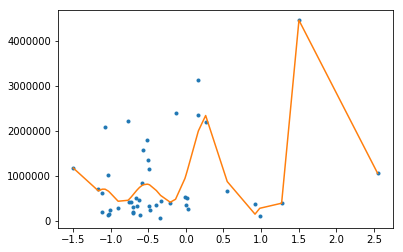

In [13]:
print_coef(set_1,1e-5)
plot_graph(set_1,1e-5)

The coefficient for power_1 is -474233.91117015446
The coefficient for power_2 is 229420.505282755
The coefficient for power_3 is 13376160.887003366
The coefficient for power_4 is -19601395.832820002
The coefficient for power_5 is -51237155.41106728
The coefficient for power_6 is 77052746.33769615
The coefficient for power_7 is 69842231.2806842
The coefficient for power_8 is -113495534.40250447
The coefficient for power_9 is -21823696.17406854
The coefficient for power_10 is 73890238.01484086
The coefficient for power_11 is -17763632.71726369
The coefficient for power_12 is -14861995.632096408
The coefficient for power_13 is 9533016.147446994
The coefficient for power_14 is -2029546.4248378328
The intercept is 1275768.8699048914


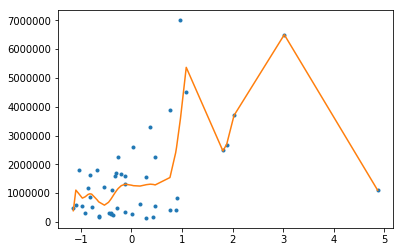

In [14]:
# your code for set_2
print_coef(set_2,1e-5)
plot_graph(set_2,1e-5)

The coefficient for power_1 is -1229266.8713371311
The coefficient for power_2 is 11006683.028598897
The coefficient for power_3 is 15591577.409232602
The coefficient for power_4 is -16304646.26920233
The coefficient for power_5 is -31157152.229132343
The coefficient for power_6 is -58839957.6675778
The coefficient for power_7 is 48736430.21875664
The coefficient for power_8 is 146794768.55406278
The coefficient for power_9 is -92170327.45103996
The coefficient for power_10 is -99484044.79577537
The coefficient for power_11 is 85801610.4093138
The coefficient for power_12 is 8017541.518220152
The coefficient for power_13 is -25441578.649127617
The coefficient for power_14 is 8526159.013944663
The intercept is 1137485.6359836743


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.24541e-19): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.24541e-19): result may not be accurate.
  overwrite_a=True).T


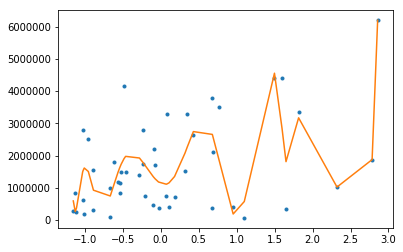

In [15]:
# your code for set_3
print_coef(set_3,1e-5)
plot_graph(set_3,1e-5)

The coefficient for power_1 is -1648108.178818252
The coefficient for power_2 is -4209259.611382267
The coefficient for power_3 is 5529196.041519811
The coefficient for power_4 is 21941357.08753184
The coefficient for power_5 is 11206475.523461496
The coefficient for power_6 is -26765688.348782033
The coefficient for power_7 is -51503125.04599912
The coefficient for power_8 is 2760487.3202364813
The coefficient for power_9 is 77604345.2366201
The coefficient for power_10 is 117741.56619840757
The coefficient for power_11 is -55287779.693882786
The coefficient for power_12 is 13192559.139140466
The coefficient for power_13 is 13723866.854281733
The coefficient for power_14 is -7203135.764974989
The intercept is 1248334.079105543


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.68436e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.68436e-20): result may not be accurate.
  overwrite_a=True).T


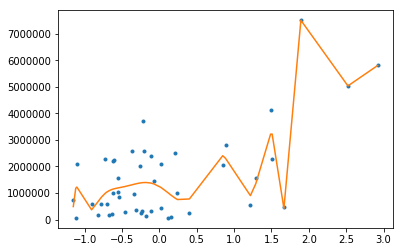

In [16]:
# your code for set_4
print_coef(set_4,1e-5)
plot_graph(set_4,1e-5)

The four curves should differ from one another a lot, as should the coefficients you learned.

There is obvious overfitting here--as the model does not generalize for each sets of data. You can expect poor performance from the test data set too. We have a high variance problem here with our model.


# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights.
With the argument l2_penalty=1e5, fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4. Other than the change in the l2_penalty parameter, the code should be the same as the experiment above. 

The coefficient for power_1 is 65.63907365772938
The coefficient for power_2 is 3.486180974723092
The coefficient for power_3 is 94.59612929646173
The coefficient for power_4 is 67.47135067990142
The coefficient for power_5 is 198.67863036693478
The coefficient for power_6 is 206.20276296316442
The coefficient for power_7 is 440.5187773511912
The coefficient for power_8 is 511.92082226136483
The coefficient for power_9 is 969.0543941069933
The coefficient for power_10 is 1145.733908163449
The coefficient for power_11 is 2001.7127132824685
The coefficient for power_12 is 2157.280115289358
The coefficient for power_13 is 3226.024083315447
The coefficient for power_14 is 1603.2806717116894
The intercept is 825048.6782482053


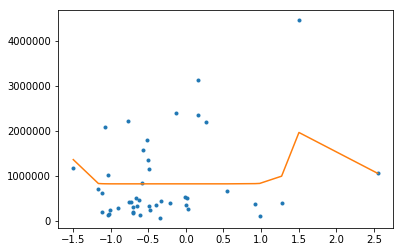

In [17]:
#Note: the dataset here may not be optimized. But please focus on the concept. 
print_coef(set_1,1e5)
plot_graph(set_1,1e5)

The coefficient for power_1 is 159.01426196358287
The coefficient for power_2 is 50.530131487016085
The coefficient for power_3 is 149.4516645949022
The coefficient for power_4 is 78.23488300339649
The coefficient for power_5 is 177.68941650353904
The coefficient for power_6 is 127.02167138607783
The coefficient for power_7 is 255.04287267397686
The coefficient for power_8 is 228.74743419745752
The coefficient for power_9 is 402.58971932412095
The coefficient for power_10 is 381.470678681564
The coefficient for power_11 is 543.5689096150526
The coefficient for power_12 is 360.5363047676364
The coefficient for power_13 is 253.28592210553265
The coefficient for power_14 is -272.9343792875044
The intercept is 1300284.9895872034


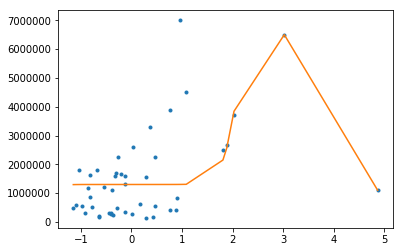

In [18]:
# your code for set_2 with Ridge Regression
print_coef(set_2,1e5)
plot_graph(set_2,1e5)

The coefficient for power_1 is 143.5933068287386
The coefficient for power_2 is 47.674993370358415
The coefficient for power_3 is 231.61562104219303
The coefficient for power_4 is 182.21167597563144
The coefficient for power_5 is 455.1764773993853
The coefficient for power_6 is 473.1410857830837
The coefficient for power_7 is 863.3075006317387
The coefficient for power_8 is 904.6265876057336
The coefficient for power_9 is 1274.2084310124908
The coefficient for power_10 is 977.7761426295868
The coefficient for power_11 is 767.9417249512254
The coefficient for power_12 is -397.3811394804038
The coefficient for power_13 is -639.4641696762377
The coefficient for power_14 is 256.03644886706513
The intercept is 1584296.7233314593


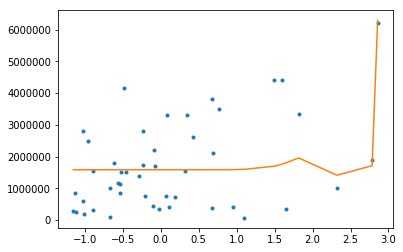

In [19]:
# your code for set_3 with Ridge Regression
print_coef(set_3,1e5)
plot_graph(set_3,1e5)

The coefficient for power_1 is 64.62890225827837
The coefficient for power_2 is 30.197672000339683
The coefficient for power_3 is 108.88219260381663
The coefficient for power_4 is 110.76040347237371
The coefficient for power_5 is 248.79683186340077
The coefficient for power_6 is 357.97103929797004
The coefficient for power_7 is 676.2795159941049
The coefficient for power_8 is 1057.012048951792
The coefficient for power_9 is 1767.577585583009
The coefficient for power_10 is 2560.2137303345967
The coefficient for power_11 is 3451.131184056731
The coefficient for power_12 is 3418.6372194894875
The coefficient for power_13 is 1386.4332061134733
The coefficient for power_14 is -3409.1134869789676
The intercept is 1225798.8478521872


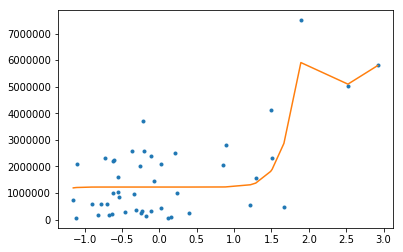

In [20]:
# your code for set_4 with Ridge Regression
print_coef(set_4,1e5)
plot_graph(set_4,1e5)

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last project, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:
Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.
To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments (use sklearn.utils.shuffle). We reserve 10% of the data as the test set and shuffle the remainder.

In [21]:
train_valid = data.sample(frac=0.9,random_state=1)
test_data = data.drop(train_valid.index)
from sklearn.utils import shuffle
train_valid_shuffled = shuffle(train_valid)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [26]:
# your code
def compute_validation_errors(k,l2_penalty,data,output_name,features_list):
    n = len(data)
    validation_RSS_sum = 0
    for i in range(0,k):
        start = int((n*i/k))
        end = int((n*(i+1)/k)-1)
        
        validation = data[start:end]
        traning_1 = data[0:start]
        traning_2 = data[end:n]
        traning = traning_1.append(traning_2)
        
        model = Ridge(alpha = l2_penalty)
        model_train_valid = model.fit(data[features_list],data[output_name])
        
        validation_RSS =((validation[output_name]-model_train_valid.predict(validation[features_list]))**2).sum()
        validation_RSS_sum = validation_RSS_sum + validation_RSS
    return validation_RSS_sum / k

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `SQUARE FEET` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [30]:
# your code
train_valid_shuffled['sqft_scale'] = scale(train_valid_shuffled['SQUARE FEET'])
poly15_data = polynomial_df(train_valid_shuffled['sqft_scale'],15)
my_features = list(poly15_data.columns.values)
poly15_data['price'] = train_valid_shuffled['PRICE']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
result_dict = {}
for l2_penalty in np.logspace(1,7,num=13):
    result_dict[l2_penalty] = compute_validation_errors(10,l2_penalty,poly15_data,'price',my_features)
    sorted_result_dict =[(k,result_dict[k]) for k in sorted(result_dict,key = result_dict.get)]
    print (sorted_result_dict)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.69917e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.69917e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.69917e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.69917e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.69917e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarni

[(10.0, 21396570389424.297)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01), (316.22776601683796, 21912651005974.54)]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68679e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68679e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68679e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68679e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68679e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarni

[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01), (316.22776601683796, 21912651005974.54), (1000.0, 22182522302350.98)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01), (316.22776601683796, 21912651005974.54), (1000.0, 22182522302350.98), (3162.2776601683795, 22507455551593.676)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01), (316.22776601683796, 21912651005974.54), (1000.0, 22182522302350.98), (3162.2776601683795, 22507455551593.676), (10000.0, 23128853999478.79)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01), (316.22776601683796, 21912651005974.54), (1000.0, 22182522302350.98), (3162.2776601683795, 22507455551593.676), (10000.0, 23128853999478.79), (31622.776601683792, 23964901754992.336)]
[(10.0, 21396570389424.297), (31.622776601683793, 21503550733079.547), (100.0, 21678615248266.01

In [39]:
print (min(result_dict.items(),key = lambda x:x[1]))

(10.0, 21396570389424.297)


What is the best value for the L2 penalty according to 10-fold validation? You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.

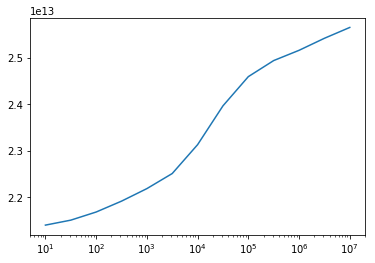

In [40]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
# your code
lists = sorted(result_dict.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.xscale('log')

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [41]:
poly15_data = polynomial_df(train_valid_shuffled['SQUARE FEET'], 15)
my_features = list(poly15_data.columns.values)
poly15_data['price'] = train_valid_shuffled['PRICE']
model = Ridge(alpha = 10.0)
poly15_model = model.fit(poly15_data[my_features],poly15_data['price'])

In [46]:
poly15_test = polynomial_df(test_data['SQUARE FEET'], 15)
predictions = poly15_model.predict(poly15_test)
errors = predictions - test_data['PRICE']
rss = (errors*errors).sum()
print (rss)

1.9196791199274476e+18


# Implement ridge regression via gradient descent

Now we are going to implement ridge regession via gradient descent. We will:
* Convert dataframe into a numpy array
* Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

first copy and past get_numpy_data() and predict_output() function from the 2nd project.

In [49]:
# your code
def get_numpy_data(data, features, output):
    data['constant'] = 1
    features = ['constant'] + features
    feature_frame = data[features]
    feature_matrix = feature_frame.to_numpy()
    output_array = data[output].to_numpy()
    return(feature_matrix, output_array)

In [50]:
# your code
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

# Computing the Derivative

We are now going to move to computing the derivative of the regression cost function. The cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.
```
Cost(w)
= SUM[ (prediction - output)^2 ]
+ l2_penalty*(w[0]^2 + w[1]^2 + ... + w[k]^2).
```

Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in Week 2 and add the derivative of the regularization part.  As we saw, the derivative of the RSS with respect to `w[i]` can be written as: 
```
2*SUM[ error*[feature_i] ].
```
The derivative of the regularization term with respect to `w[i]` is:
```
2*l2_penalty*w[i].
```
Summing both, we get
```
2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i].
```
That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus `2*l2_penalty*w[i]`. 

**We will not regularize the constant.**  Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the `2*l2_penalty*w[0]` term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus `2*l2_penalty*w[i]`.

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).  To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call `feature_is_constant` which you should set to `True` when computing the derivative of the constant and `False` otherwise.

In [51]:
def feature_derivative_ridge(errors, features, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2* np.dot(errors, features)
    # your code
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
        # your code
    else:
        derivative = 2* np.dot(errors, features) + 2*l2_penalty*weight
    return derivative

Let's test the feature derivative function by running the following code:

In [52]:
(example_features, example_output) = get_numpy_data(data, ['SQUARE FEET'], 'PRICE') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20)


# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2)

-1292850463516.0
-1292850463516.0
-512087414.0
-512087414.0


# Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of *increase* and therefore the negative gradient is the direction of *decrease* and we're trying to *minimize* a cost function. 

The amount by which we move in the negative gradient *direction*  is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. Unlike in Project 2, this time we will set a **maximum number of iterations** and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.

In [78]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print ('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    # your code # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    weights = np.array(initial_weights)
    while max_iterations >0:# your code:
    #while not reached maximum number of iterations:
        # your code 
        
        # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        # your code
        predictions = predict_output(feature_matrix,weights)
        # compute the errors as predictions - output
        # your code
        errors = predictions - output
        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print ('Cost function = '+ str(errors)), # your code
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            # your code
            if i ==0:
                feature_is_constant = True
            else:
                feature_is_constant - False
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)
            # subtract the step size times the derivative from the current weight
            # your code
            weights[i] = weights[i]-(step_size * derivative)
    print ('Done with gradient descent at iteration ', iteration)
    print ('Learned weights = ', str(weights))
    return weights

# Visualizing effect of L2 penalty

The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:

In [79]:
data = pd.read_csv('santa_clara_county.csv')
data = data[data['PRICE'].notnull()]
data = data[data['SQUARE FEET'].notnull()]

In [80]:
simple_features = ['SQUARE FEET']
my_output = 'PRICE'

Let us split the dataset into training set and test set with 80/20:

In [81]:
# your code
train_data,test_data = train_test_split(data,test_size = 0.2,random_state = 0)

In this part, we will only use 'SQUARE FEET' to predict 'PRICE'. Use the get_numpy_data function to get a Numpy versions of your data with only this feature, for both the train_data and the test_data.

In [82]:
# your code
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Let's set the parameters for our optimization:

In [83]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

First, let's consider no regularization. Set the l2_penalty to 0.0 and run your ridge regression algorithm to learn the weights of your model. Call your weights:
simple_weights_0_penalty
we'll use them later.

In [ ]:
# your code
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             0.0, max_iterations)
print (simple_weights_0_penalty)

Next, let's consider high regularization. Set the l2_penalty to 3.e9 and run your ridge regression algorithm to learn the weights of your model. Call your weights:
simple_weights_high_penalty
we'll use them later.

In [ ]:
# your code
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             1e11, max_iterations)
print simple_weights_high_penalty

Use the code below to plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Compute the RSS on the TEST data for the following three sets of weights:
The initial weights (all zeros)
The weights learned with no regularization
The weights learned with high regularization
Which weights perform best?

In [34]:
# your code
initial_predictions = predict_output(simple_test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print initial_RSS

9.499852125e+13


In [35]:
# your code
no_regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print no_regularization_RSS

3.47108640305e+13


In [36]:
# your code
regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print regularization_RSS

7.0847817517e+13


why do you think the RSS for test sets are in this way?

# Running a multiple regression with L2 penalty

Now do some research on a model with multiple features. For example, you can explore "SQUARE FEET" and number of bedrooms and bathrooms. Remember to re-initialize your weights since now you have multiple parameters. First consider no regularization and then run it with regularization. 

Compute the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization

Which weights perform best?

In [ ]:
# your code
model_features = ['SQUARE FEET','BEDS','BATHS']
my_output ='PRICE'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [ ]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                               initial_weights, step_size, 
                                                               0.0, max_iterations)
print multiple_weights_0_penalty

In [ ]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                               initial_weights, step_size, 
                                                               1e11, max_iterations)
print multiple_weights_high_penalty

In [ ]:
initial_predictions = predict_output(test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print initial_RSS

In [ ]:
no_regularization_predictions = predict_output(test_feature_matrix, multiple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print no_regularization_RSS

In [ ]:
regularization_predictions = predict_output(test_feature_matrix, multiple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print regularization_RSS